In [2]:
from numpy import arange
from pandas import read_csv
import sklearn
from sklearn.model_selection import RepeatedKFold
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
import random
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

from matplotlib import pyplot

from joblib import Parallel, delayed
import joblib

In [4]:
###### Loading datasets ########

# Load train dataset
#train_url = '/Users/agrawalp4/Documents/Varun_work/ml/category_75nM/promoters/k27ac/full_data.csv'
#train_url = '/Users/agrawalp4/Documents/Varun_work/ml/cellline_RH4/ml/up_down/svm/full_rh4_data.csv'
total_train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_train.csv"
total_train_genes = read_csv("/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_train_gene_list.csv",
                      header=0, index_col=False)

#train_url = '/Users/agrawalp4/Downloads/train.csv'
total_dataframe_train = read_csv(total_train_url, header=0, index_col=False)
total_data_train = total_dataframe_train.values
total_X_train, total_y_train = total_data_train[:, :-1], total_data_train[0:, -1]

# Load test dataset
#test_url = '/Users/agrawalp4/Documents/Varun_work/ml/HBEC/prom_tss.csv'
total_test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_test.csv"
total_test_genes = read_csv("/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_test_gene_list.csv",
                      header=0, index_col=False)
total_dataframe_test = read_csv(total_test_url, header=0, index_col=False)
total_data_test = total_dataframe_test.values
total_X_test, total_y_test = total_data_test[:, :-1], total_data_test[0:, -1]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'downregulated.regen_Fraction_sp_less2'),
  Text(2, 0, 'downregulated.stress_Fraction_sp_less2'),
  Text(3, 0, 'downregulated.wound_Fraction_sp_less2'),
  Text(4, 0, 'msigdb.regen_Fraction_sp_less2'),
  Text(5, 0, 'msigdb.stress_Fraction_sp_less2'),
  Text(6, 0, 'msigdb.wound_Fraction_sp_less2'),
  Text(7, 0, 'upregulated.regen_Fraction_sp_less2'),
  Text(8, 0, 'upregulated.stress_Fraction_sp_less2'),
  Text(9, 0, 'upregulated.wound_Fraction_sp_less2'),
  Text(10, 0, 'label')])

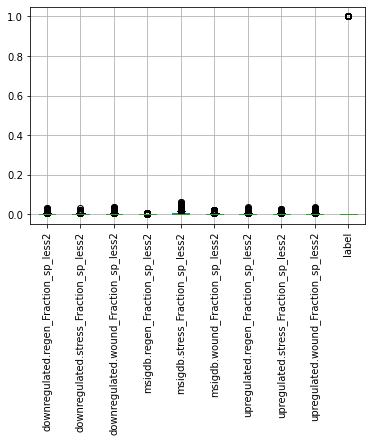

In [3]:
df = total_dataframe_train.loc[:, total_dataframe_train.columns != 'degree']

df.boxplot()

plt.xticks(rotation=90)

In [4]:
def svc_model(X_train, y_train, X_test, y_test):
    clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
    clf.fit(X_train, y_train)
    np.random.seed(786)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)
    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    
    return(clf)

def random_forest_model(X_train, y_train, X_test, y_test):
    np.random.seed(786)

    clf = RandomForestClassifier(n_estimators=1000)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    
    return(clf)

def ada_boost_model(X_train, y_train, X_test, y_test):

    clf = AdaBoostClassifier(n_estimators=10)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    return(clf)

def gradient_boost_model(X_train, y_train, X_test, y_test):
    clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict_proba(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred1[:,1])
    print("roc_auc on test data : %f" % score_res)
    return(clf)
    
def logistic_regression_model(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(penalty='l1', C=1.0, class_weight=None, solver='liblinear')
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred)
    print("roc_auc on test data : %f" % score_res)
    return(clf)

def extra_trees_model(X_train, y_train, X_test, y_test):
    clf = ExtraTreesClassifier(n_estimators=100, random_state=2)
    clf.fit(X_train, y_train)

    # make a prediction
    y_pred = clf.predict(X_test)

    # summarize prediction

    average_precision = precision_score(y_test, y_pred)
    print('Average precision score: {0:0.2f}'.format(average_precision))

    average_recall = recall_score(y_test, y_pred)
    print('Average recall score: {0:0.2f}'.format(average_recall))

    score_res = f1_score(y_test,y_pred)
    print("f1 on test data : %f" % score_res)

    score_res = accuracy_score(y_test,y_pred)
    print("Accuray on test data : %f" % score_res)

    score_res = roc_auc_score(y_test,y_pred)
    print("roc_auc on test data : %f" % score_res)
    return(clf)


Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.471128


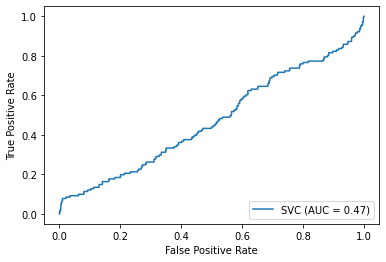

In [5]:
####### Support Vector Classifier ####

clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
clf.fit(total_X_train, total_y_train)
np.random.seed(786)

# make a prediction
y_pred = clf.predict(total_X_test)
y_pred1 = clf.predict_proba(total_X_test)
# summarize prediction

average_precision = precision_score(total_y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(total_y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(total_y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(total_y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(total_y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, total_X_test, total_y_test)

#r2_score_res = r2_score(y_test, y_pred)
#print("r^2 on test data : %f" % r2_score_res)

0
####### Random Forest Classifier ####
Average precision score: 0.18
Average recall score: 0.05
f1 on test data : 0.078212
Accuray on test data : 0.957353
roc_auc on test data : 0.612672
1
####### Random Forest Classifier ####
Average precision score: 0.20
Average recall score: 0.01
f1 on test data : 0.013699
Accuray on test data : 0.962781
roc_auc on test data : 0.730871
2
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.962523
roc_auc on test data : 0.659073
3
####### Random Forest Classifier ####
Average precision score: 0.40
Average recall score: 0.03
f1 on test data : 0.052980
Accuray on test data : 0.963040
roc_auc on test data : 0.649651
4
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.962523
roc_auc on test data : 0.813621
5
####### Random Forest Classifier ####
Average precision sc

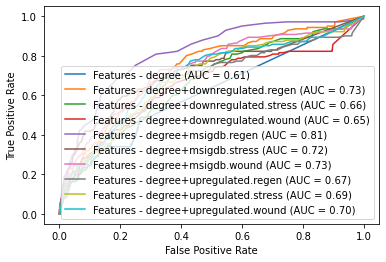

In [6]:
ax = plt.gca()
for feat in range(0,len(total_dataframe_train.columns)-1):
    print(feat)
    np.random.seed(786)
    
    
    # Load train dataset
    train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_train.csv"
    dataframe_train = read_csv(train_url, header=0)
    data_train = dataframe_train.values
    X_train, y_train = data_train[:, [feat]], data_train[0:, -1]

    # Load test dataset
    test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_test.csv"
    dataframe_test = read_csv(test_url, header=0)
    data_test = dataframe_test.values
    X_test, y_test = data_test[:, [feat]], data_test[0:, -1]
    
    print("####### Random Forest Classifier ####")
    rf_clf = random_forest_model(X_train, y_train, X_test, y_test)

    
    if feat == 0:
        curve_name = "Features - " + dataframe_train.columns[feat]
        plot_roc_curve(rf_clf, X_test, y_test, name = curve_name, ax = ax)
    else:
        curve_name = "Features - degree+" + dataframe_train.columns[feat][:-18]
        plot_roc_curve(rf_clf, X_test, y_test, name = curve_name, ax=ax)
    

In [7]:
cols = dataframe_train.columns.tolist()
cols = [cols[0],cols[4],cols[9],cols[1],cols[2],cols[6],cols[8],cols[5],cols[3],cols[7], "label"]

1
####### Support Vector Classifier ####
Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.470738
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.715000
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.766503
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.701402
####### Logistic_regression Classifier ####
Average precision score: 0.33
Average recall score: 0.02
f1 on test data : 0.040000
Accuray on test data : 0.962781
roc_auc on test data : 0.509834
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.500000
2
####### Support Vector Classifier ####
Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.505583
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.702991
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.766503
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.696407
####### Logistic_regression Classifier ####
Average precision score: 0.33
Average recall score: 0.02
f1 on test data : 0.040000
Accuray on test data : 0.962781
roc_auc on test data : 0.509834
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.500000
3
####### Support Vector Classifier ####
Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.497743
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.707258
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.766503
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.693641
####### Logistic_regression Classifier ####
Average precision score: 0.33
Average recall score: 0.02
f1 on test data : 0.040000
Accuray on test data : 0.962781
roc_auc on test data : 0.509834
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.500000
4
####### Support Vector Classifier ####
Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.507331
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.695717
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.731600
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.745365
####### Logistic_regression Classifier ####
Average precision score: 0.40
Average recall score: 0.03
f1 on test data : 0.052980
Accuray on test data : 0.963040
roc_auc on test data : 0.513380
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.500000
5
####### Support Vector Classifier ####
Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.517990
####### Random Forest Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.691405
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.731600
####### Gradient Boost Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.731096
####### Logistic_regression Classifier ####
Average precision score: 0.33
Average recall score: 0.02
f1 on test data : 0.040000
Accuray on test data : 0.962781
roc_auc on test data : 0.509834
####### Extra Trees Classifier ####


/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.500000
6
####### Support Vector Classifier ####
Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.453207
####### Random Forest Classifier ####
Average precision score: 0.15
Average recall score: 0.04
f1 on test data : 0.057143
Accuray on test data : 0.957353
roc_auc on test data : 0.707776
####### AdaBoost Classifier ####
Average precision score: 0.04
Average recall score: 0.01
f1 on test data : 0.011905
Accuray on test data : 0.957095
roc_auc on test data : 0.671146
####### Gradient Boost Classifier ####
Average precision score: 0.11
Average recall score: 0.15
f1 on test data : 0.126126
Accuray on test data : 0.924787
roc_auc on test data : 0.703428
####### Logistic_regression Classifier ####
Average precision score: 0.33
Average recall score: 0.02
f1 on te

/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.785231
####### Logistic_regression Classifier ####
Average precision score: 0.33
Average recall score: 0.02
f1 on test data : 0.040000
Accuray on test data : 0.962781
roc_auc on test data : 0.509834
####### Extra Trees Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.962264
roc_auc on test data : 0.499329
8
####### Support Vector Classifier ####
Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.522378
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963040
roc_auc on test data : 0.641927
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test 

/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.764923
####### Logistic_regression Classifier ####
Average precision score: 0.33
Average recall score: 0.02
f1 on test data : 0.040000
Accuray on test data : 0.962781
roc_auc on test data : 0.509834
####### Extra Trees Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.962264
roc_auc on test data : 0.499329
9
####### Support Vector Classifier ####
Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.504200
####### Random Forest Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.959163
roc_auc on test data : 0.642359
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test 

/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.00
Average recall score: 0.00
f1 on test data : 0.000000
Accuray on test data : 0.963556
roc_auc on test data : 0.807422
####### Logistic_regression Classifier ####
Average precision score: 0.40
Average recall score: 0.03
f1 on test data : 0.052980
Accuray on test data : 0.963040
roc_auc on test data : 0.513380
####### Extra Trees Classifier ####
Average precision score: 0.09
Average recall score: 0.01
f1 on test data : 0.024540
Accuray on test data : 0.958904
roc_auc on test data : 0.504410
10
####### Support Vector Classifier ####
Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.503443
####### Random Forest Classifier ####
Average precision score: 0.18
Average recall score: 0.05
f1 on test data : 0.078212
Accuray on test data : 0.957353
roc_auc on test data : 0.612672
####### AdaBoost Classifier ####
Average precision score: 0.00
Average recall score: 0.00
f1 on test

/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/timonaj/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score: 0.33
Average recall score: 0.02
f1 on test data : 0.040000
Accuray on test data : 0.962781
roc_auc on test data : 0.509834
####### Extra Trees Classifier ####
Average precision score: 0.21
Average recall score: 0.05
f1 on test data : 0.080000
Accuray on test data : 0.958387
roc_auc on test data : 0.521201


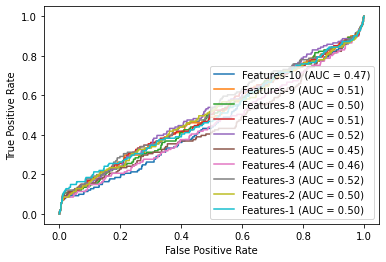

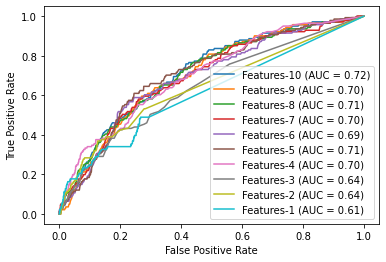

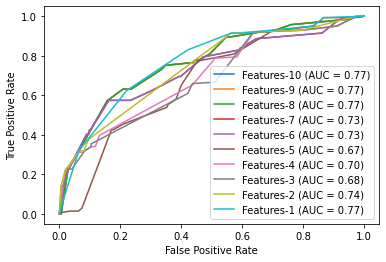

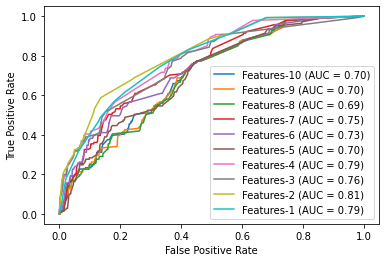

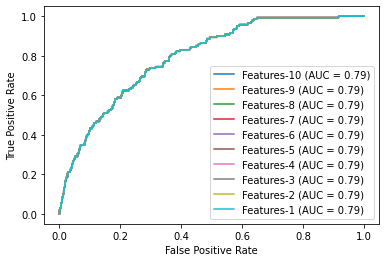

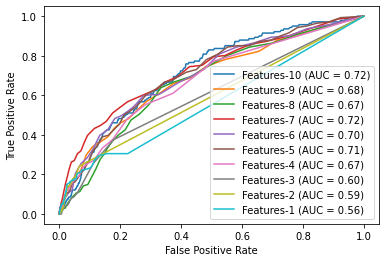

In [8]:
svm_plt_list = []
rf_plt_list = []
ada_boost_plt_list = []
gradient_boost_plt_list = []
log_reg_plt_list = []
extra_trees_plt_list = []
for feat in range(1,len(dataframe_train.columns)):
    print(feat)
    
    
    # Load train dataset
    train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_train.csv"
    dataframe_train = read_csv(train_url, header=0)
    dataframe_train = dataframe_train
    data_train = dataframe_train.values
    X_train, y_train = data_train[:, :-feat], data_train[0:, -1]

    # Load test dataset
    test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_test.csv"
    dataframe_test = read_csv(test_url, header=0)
    dataframe_test = dataframe_test[cols]
    data_test = dataframe_test.values
    X_test, y_test = data_test[:, :-feat], data_test[0:, -1]
    
    print("####### Support Vector Classifier ####")
    svm_clf = svc_model(X_train, y_train, X_test, y_test)
    print("####### Random Forest Classifier ####")
    rf_clf = random_forest_model(X_train, y_train, X_test, y_test)
    print("####### AdaBoost Classifier ####")
    ada_boost_clf = ada_boost_model(X_train, y_train, X_test, y_test)
    print("####### Gradient Boost Classifier ####")
    gradient_boost_clf = gradient_boost_model(X_train, y_train, X_test, y_test)
    print("####### Logistic_regression Classifier ####")
    log_reg_clf = logistic_regression_model(X_train, y_train, X_test, y_test)
    print("####### Extra Trees Classifier ####")
    extra_trees_clf = extra_trees_model(X_train, y_train, X_test, y_test)

    
    if feat == 1:
        curve_name = "Features-" + str(len(dataframe_train.columns)-1)
        svm_plt_list.append(plot_roc_curve(svm_clf, X_test, y_test, name = curve_name))
        rf_plt_list.append(plot_roc_curve(rf_clf, X_test, y_test, name = curve_name))
        ada_boost_plt_list.append(plot_roc_curve(ada_boost_clf, X_test, y_test, name = curve_name))
        gradient_boost_plt_list.append(plot_roc_curve(gradient_boost_clf, X_test, y_test, name = curve_name))
        log_reg_plt_list.append(plot_roc_curve(log_reg_clf, X_test, y_test, name = curve_name))
        extra_trees_plt_list.append(plot_roc_curve(rf_clf, X_test, y_test, name = curve_name))
    else:
        curve_name = "Features-" + str(len(dataframe_train.columns)-feat)
        svm_plt_list.append(plot_roc_curve(svm_clf, X_test, y_test, name = curve_name, ax=svm_plt_list[feat - 2].ax_))
        rf_plt_list.append(plot_roc_curve(rf_clf, X_test, y_test, name = curve_name, ax=rf_plt_list[feat - 2].ax_))
        ada_boost_plt_list.append(plot_roc_curve(ada_boost_clf, X_test, y_test, name = curve_name, ax=ada_boost_plt_list[feat - 2].ax_))
        gradient_boost_plt_list.append(plot_roc_curve(gradient_boost_clf, X_test, y_test, name = curve_name, ax=gradient_boost_plt_list[feat - 2].ax_))
        log_reg_plt_list.append(plot_roc_curve(log_reg_clf, X_test, y_test, name = curve_name, ax=log_reg_plt_list[feat - 2].ax_))
        extra_trees_plt_list.append(plot_roc_curve(extra_trees_clf, X_test, y_test, name = curve_name, ax=extra_trees_plt_list[feat - 2].ax_))
    

Average precision score: 0.50
Average recall score: 0.01
f1 on test data : 0.013986
Accuray on test data : 0.963556
roc_auc on test data : 0.503443


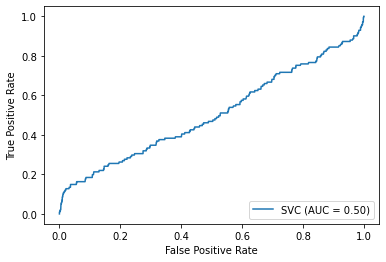

In [9]:

####### Support Vector Classifier ####

clf = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
clf.fit(X_train, y_train)
np.random.seed(786)

# make a prediction
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)
# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

In [35]:
# res = pd.DataFrame(y_pred1)
# res.to_csv("/Users/agrawalp4/Documents/Varun_work/ml/cellline_RH4/ml/up_down/svm/hct_svm_pred", sep=',', index=False)

In [5]:
#y_pred1

In [23]:
# ####### Random Forest Classifier ####
# import random
# from sklearn.ensemble import RandomForestClassifier
# np.random.seed(786)

# clf = RandomForestClassifier(n_estimators=1000)
# clf.fit(X_train, y_train)

# # make a prediction
# y_pred = clf.predict(X_test)
# y_pred1 = clf.predict_proba(X_test)

# # summarize prediction

# average_precision = precision_score(y_test, y_pred)
# print('Average precision score: {0:0.2f}'.format(average_precision))

# average_recall = recall_score(y_test, y_pred)
# print('Average recall score: {0:0.2f}'.format(average_recall))

# score_res = f1_score(y_test,y_pred)
# print("f1 on test data : %f" % score_res)

# score_res = accuracy_score(y_test,y_pred)
# print("Accuray on test data : %f" % score_res)

# score_res = roc_auc_score(y_test,y_pred1[:,1])
# print("roc_auc on test data : %f" % score_res)

# plot_roc_curve(clf, X_test, y_test)

In [24]:
# y_pred1

In [25]:
# test_genes['x']

In [26]:
# score_df = pd.DataFrame(y_pred1, test_genes['x'])
# print(score_df.head())
# prediction_df =  pd.DataFrame(y_pred, test_genes['x'])
# print(prediction_df.head())
# actual_df = pd.DataFrame(y_test, test_genes['x'])
# print(actual_df.head())
# final_prediction_df = pd.concat([score_df, prediction_df, actual_df], axis = 1, ignore_index = True)

# print(final_prediction_df.head())

In [27]:
# actual_value_scores.loc[actual_value_scores[1] == 1][0]

In [30]:
# actual_value_scores = pd.concat([score_df[1], actual_df], axis = 1, ignore_index = True)
# print(actual_value_scores.head())
# ax = actual_value_scores.boxplot(by=1,
#                                  fontsize=8,
#                                  layout=(2,1),
#                                  rot=90,
#                                  figsize=(10,20)
#                                 )

# ax[0].set_title('Distribution of Random Forest Model Score')
# ax[0].set_xlabel('COSMIC Cancer Driver Status')
# ax[0].set_ylabel('Random Forest Model socre')
# mannwhitneyu(actual_value_scores.loc[actual_value_scores[1] == 1][0],
# #                 actual_value_scores.loc[actual_value_scores[1] == 0][0])

In [31]:
# actual_value_scores.loc[actual_value_scores[1] > 1][0]

In [32]:
# round(len(actual_value_scores)*.1)

In [33]:
# top_10_highest_scoring = actual_value_scores.sort_values(0).tail(round(len(actual_value_scores)*.1))
# top_10_lowest_scoring = actual_value_scores.sort_values(0).head(round(len(actual_value_scores)*.1))

In [34]:
# output_df_high = pd.DataFrame({"Gene": top_10_highest_scoring.index.values,
#                           "GeneType" : ['high']*len(top_10_highest_scoring)})
# output_df_low = pd.DataFrame({"Gene": top_10_lowest_scoring.index.values,
#                           "GeneType" : ['low']*len(top_10_lowest_scoring)})
# final_output_df = pd.concat([output_df_high, output_df_low], axis = 0, ignore_index = True)
# final_output_df.to_csv("/data/timonaj/Arash_code/oncoFeats/up_ml_pred.txt", sep='\t', index=False)

In [2]:
####### Random Forest Classifier ####
import random
from sklearn.ensemble import RandomForestClassifier

# Load train dataset
train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_train.csv"
dataframe_train = read_csv(train_url, header=0)
dataframe_train = dataframe_train
data_train = dataframe_train.values
X_train, y_train = data_train[:, :-1], data_train[0:, -1]

# Load test dataset
test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_test.csv"
dataframe_test = read_csv(test_url, header=0)
dataframe_test = dataframe_test
data_test = dataframe_test.values
X_test, y_test = data_test[:, :-1], data_test[0:, -1]

np.random.seed(786)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res_f1 = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res_f1)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test, name = curve_name)
clf

Average precision score: 0.50
Average recall score: 0.05
f1 on test data : 0.090323
Accuray on test data : 0.963556
roc_auc on test data : 0.831525


NameError: name 'curve_name' is not defined

In [ ]:
# calculate prc
precision, recall, thresholds = precision_recall_curve(y_test, pd.DataFrame(y_pred1)[1])

In [ ]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [17]:
total_score_df = pd.DataFrame(y_pred1, total_test_genes['x'])
print(total_score_df.head())
total_prediction_df =  pd.DataFrame(total_y_pred, total_test_genes['x'])
print(total_prediction_df.head())
total_actual_df = pd.DataFrame(total_y_test, total_test_genes['x'])
print(total_actual_df.head())
total_final_prediction_df = pd.concat([total_score_df, total_prediction_df, total_actual_df], axis = 1, ignore_index = True)

print(total_final_prediction_df.head())

KeyError: 'x'

                0  1
11                  
ARF5     0.047854  0
CALM2    0.118609  0
ARHGEF9  0.027039  0
ERN1     0.195311  0
CDKN2A   0.487068  1


MannwhitneyuResult(statistic=1473201.0, pvalue=4.2554644750163305e-204)

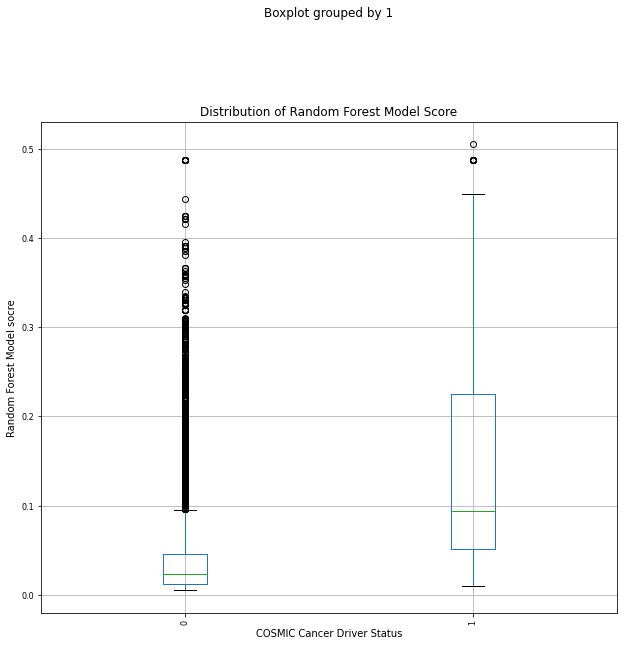

In [16]:
total_actual_value_scores = pd.concat([total_score_df[1], total_actual_df], axis = 1, ignore_index = True)
print(total_actual_value_scores.head())
total_ax = total_actual_value_scores.boxplot(by=1,
                                 fontsize=8,
                                 layout=(2,1),
                                 rot=90,
                                 figsize=(10,20)
                                )

total_ax[0].set_title('Distribution of Random Forest Model Score')
total_ax[0].set_xlabel('COSMIC Cancer Driver Status')
total_ax[0].set_ylabel('Random Forest Model socre')
mannwhitneyu(total_actual_value_scores.loc[total_actual_value_scores[1] == 1][0],
                total_actual_value_scores.loc[total_actual_value_scores[1] == 0][0])

In [18]:
non_cancer_drivers = total_actual_value_scores.loc[total_actual_value_scores[1] !=  1]

total_top_10_highest_scoring = non_cancer_drivers.sort_values(0).tail(round(len(non_cancer_drivers)*.1))
total_top_10_lowest_scoring = non_cancer_drivers.sort_values(0).head(round(len(non_cancer_drivers)*.1))

total_output_df_high = pd.DataFrame({"Gene": total_top_10_highest_scoring.index.values,
                          "GeneType" : ['high']*len(total_top_10_highest_scoring)})
total_output_df_low = pd.DataFrame({"Gene": total_top_10_lowest_scoring.index.values,
                          "GeneType" : ['low']*len(total_top_10_lowest_scoring)})
final_output_df = pd.concat([total_output_df_high, total_output_df_low], axis = 0, ignore_index = True)
final_output_df.to_csv("/data/timonaj/Arash_code/oncoFeats/total_ml_pred_STRING.txt", sep='\t', index=False)

#y_pred1
#res = pd.DataFrame(y_pred1)
#res.to_csv("/Users/agrawalp4/Documents/Varun_work/ml/HBEC/up_unchange/gene_rf_pred", sep=',', index=False)

In [6]:
####### AdaBoost Classifier ####
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

NameError: name 'X_train' is not defined

Average precision score: 0.33
Average recall score: 0.01
f1 on test data : 0.028369
Accuray on test data : 0.951246
roc_auc on test data : 0.811395


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


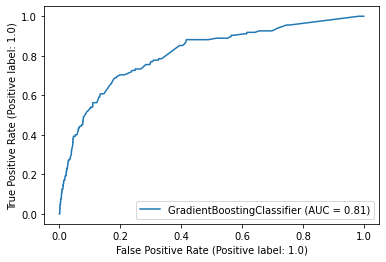

In [7]:
####### Gradient Boosting Classifier ####
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

# Load train dataset
train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_train.csv"
dataframe_train = read_csv(train_url, header=0)
dataframe_train = dataframe_train
data_train = dataframe_train.values
X_train, y_train = data_train[:, 1:-1], data_train[0:, -1]

# Load test dataset
test_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_test.csv"
dataframe_test = read_csv(test_url, header=0)
dataframe_test = dataframe_test
data_test = dataframe_test.values
X_test, y_test = data_test[:, 1:-1], data_test[0:, -1]

clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)
y_pred1 = clf.predict_proba(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred1[:,1])
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

precision, recall, thresholds = precision_recall_curve(y_test, pd.DataFrame(y_pred1)[1])

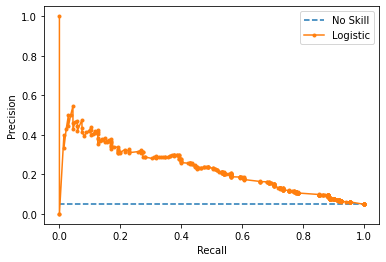

In [8]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [9]:
import time
start_time = time.time()

model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)

# Load train dataset
valid_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_validation.csv"
dataframe_valid = read_csv(valid_url, header=None)
data_valid = dataframe_valid.values

train_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_total.csv"
dataframe_train = read_csv(train_url, header=None)
data_train = dataframe_train.values
X_train, Y_train = data_train[1:, 1:-2], data_train[1:, -2]
print(X_train)
print(Y_train)

model.fit(X_train, Y_train)
print(model.score(X_train, Y_train))
X_test = X_train

# save the model to disk

####### Gradient Boosting Classifier ####
from sklearn.ensemble import GradientBoostingClassifier

filename = 'finalized_STRING_model.sav';
joblib.dump(model, open(filename, 'wb'))

print("--- %s seconds ---" % (time.time() - start_time))

[['0.00511786600496278' '0.00341191066997519' '0.0059449958643507' ...
  '0.00610008271298594' '0.00439412737799835' '0.00610008271298594']
 ['0.00703060380479735' '0.00677212572373863' '0.00837468982630273' ...
  '0.00754755996691481' '0.00480769230769231' '0.00837468982630273']
 ['0.00206782464846981' '0.00170595533498759' '0.00201612903225806' ...
  '0.00253308519437552' '0.0016025641025641' '0.00186104218362283']
 ...
 ['0' '5.16956162117452e-05' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']]
['0' '0' '0' ... '0' '0' '0']
0.9525266903914591
--- 0.577608585357666 seconds ---


In [12]:
import pandas as pd

In [13]:
valid_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_validation.csv"
dataframe_valid = read_csv(valid_url, header=None)

In [14]:
summed_drivers = dataframe_valid.loc[:,12:20].sum(axis = 1)

In [15]:
total_test_genes = dataframe_valid.iloc[:,11]
integrated_benchmarks_2 = [int(x) for x in summed_drivers > 2]
total_actual_df = pd.DataFrame(integrated_benchmarks_2, total_test_genes)

In [16]:
goldset_cancer = list(total_actual_df.loc[total_actual_df[0] == 1].index)

In [17]:
with open("goldset_cancer.txt", 'w') as fp:
    for gene in goldset_cancer:
        # write each item on a new line
        fp.write("%s\n" % gene)

In [28]:
def get_prediction_auc(model, X_test, y, set_name) :
    
    Y_test = y
    score = model.score(X_test, Y_test)
    print("accuracy " + set_name + " = " + str(score))
    
    preds = model.predict(X_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    
    #calculate AUC of model
    auc = roc_auc_score(Y_test, y_pred_proba)
    
    #print AUC score
    print("auc " + set_name + " = " + str(auc))
    plot_roc_curve(model, X_test, Y_test)
    plt.show()

accuracy Model_2 = 0.9506761565836299
auc Model_2 = 0.8410625927278095


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


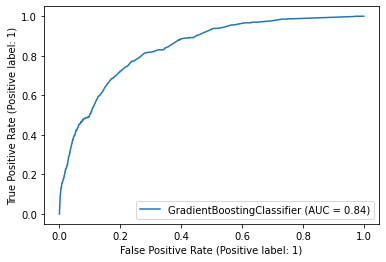

accuracy Model_3 = 0.9720284697508896
auc Model_3 = 0.8740281088310968


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


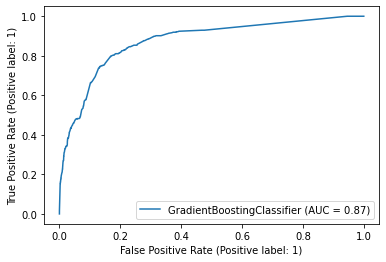

accuracy Model_4 = 0.9844839857651245
auc Model_4 = 0.9131888649419816


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


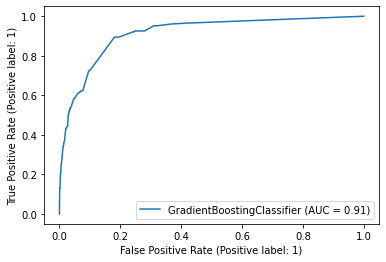

accuracy Model_5 = 0.9852669039145907
auc Model_5 = 0.9011954982425318


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


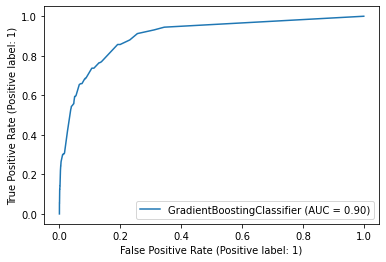

accuracy Model_6 = 0.9848398576512456
auc Model_6 = 0.6352248485223094


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


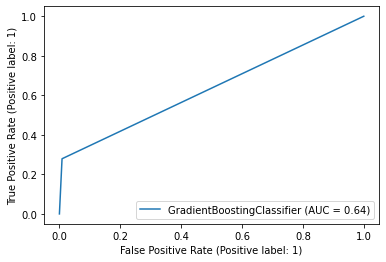

In [29]:
data_train[1:, 9:10]
summed_drivers = dataframe_valid.loc[:,12:20].sum(axis = 1)

integrated_benchmarks_2 = [int(x) for x in summed_drivers > 1]
model_2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
model_2.fit(X_train, integrated_benchmarks_2)
get_prediction_auc(model_2, X_test, integrated_benchmarks_2, "Model_2")

integrated_benchmarks_3 = [int(x) for x in summed_drivers > 2]
model_3 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
model_3.fit(X_train, integrated_benchmarks_3)
get_prediction_auc(model_3, X_test, integrated_benchmarks_3, "Model_3")

integrated_benchmarks_4 = [int(x) for x in summed_drivers > 3]
model_4 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
model_4.fit(X_train, integrated_benchmarks_4)
get_prediction_auc(model_4, X_test, integrated_benchmarks_4, "Model_4")

integrated_benchmarks_5 = [int(x) for x in summed_drivers > 4]
model_5 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
model_5.fit(X_train, integrated_benchmarks_5)
get_prediction_auc(model_5, X_test, integrated_benchmarks_5, "Model_5")

integrated_benchmarks_6 = [int(x) for x in summed_drivers > 5]
model_6 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
model_6.fit(X_train, integrated_benchmarks_6)
get_prediction_auc(model_6, X_test, integrated_benchmarks_6, "Model_6")

## redo with cross validation

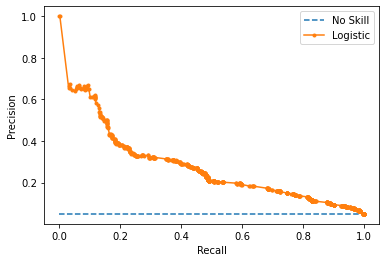

In [30]:
y_pred = model_2.predict(X_test)
y_pred1 = model_2.predict_proba(X_test)

# calculate prc
precision, recall, thresholds = precision_recall_curve(integrated_benchmarks_2, pd.DataFrame(y_pred1)[1])

# plot the precision-recall curves
no_skill = sum([x > 0 for x in integrated_benchmarks_2]) / len(integrated_benchmarks_2)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [31]:
valid_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_validation.csv"
dataframe_valid = read_csv(valid_url, header=None)

In [32]:
total_test_genes = dataframe_valid.iloc[:,11]

In [62]:
total_actual_df 

,0
11,
ARF5,0
CALM2,0
ARHGEF9,0
ERN1,0
CDKN2A,1
...,...
FAM154B,0
CCDC87,0
ZSWIM1,0


In [35]:
total_score_df = pd.DataFrame(y_pred1, total_test_genes)
print(total_score_df.head())
total_prediction_df =  pd.DataFrame(y_pred, total_test_genes)
print(total_prediction_df.head())
total_actual_df = pd.DataFrame(integrated_benchmarks_2, total_test_genes)
print(total_actual_df.head())
total_final_prediction_df = pd.concat([total_score_df, total_prediction_df, total_actual_df], axis = 1, ignore_index = True)

print(total_final_prediction_df.head())
total_actual_value_scores = pd.concat([total_score_df[1], total_actual_df], axis = 1, ignore_index = True)

                0         1
11                         
ARF5     0.952146  0.047854
CALM2    0.881391  0.118609
ARHGEF9  0.972961  0.027039
ERN1     0.804689  0.195311
CDKN2A   0.512932  0.487068
         0
11        
ARF5     0
CALM2    0
ARHGEF9  0
ERN1     0
CDKN2A   0
         0
11        
ARF5     0
CALM2    0
ARHGEF9  0
ERN1     0
CDKN2A   1
                0         1  2  3
11                               
ARF5     0.952146  0.047854  0  0
CALM2    0.881391  0.118609  0  0
ARHGEF9  0.972961  0.027039  0  0
ERN1     0.804689  0.195311  0  0
CDKN2A   0.512932  0.487068  0  1


In [60]:
total_actual_value_scores



,0,1
11,,
ARF5,0.047854,0
CALM2,0.118609,0
ARHGEF9,0.027039,0
ERN1,0.195311,0
CDKN2A,0.487068,1
...,...,...
FAM154B,0.010860,0
CCDC87,0.010860,0
ZSWIM1,0.010860,0


In [36]:
non_cancer_drivers = total_actual_value_scores

total_top_25_highest_scoring = non_cancer_drivers.sort_values(0).tail(round(len(non_cancer_drivers)*.25))
total_top_25_lowest_scoring = non_cancer_drivers.sort_values(0).head(round(len(non_cancer_drivers)*.25))



In [37]:
high_non_cancer = list(total_top_25_highest_scoring.loc[total_top_25_highest_scoring[1] == 0].index)
print(len(high_non_cancer))

high_non_cancer_top = list(total_top_25_highest_scoring.loc[total_top_25_highest_scoring[1] == 0].index)[0:520]
print(len(high_non_cancer_top))

high_cancer = list(total_top_25_highest_scoring.loc[total_top_25_highest_scoring[1] == 1].index)
print(len(high_cancer))
# high non cancer matched to cancer (520)

2992
520
520


In [38]:
top_1000 = list(total_top_25_highest_scoring.loc[total_top_25_highest_scoring[1] == 0].index)[0:1000]

In [39]:
dataframe_train[11].isin(top_1000)

0        False
1        False
2        False
3        False
4        False
         ...  
14046    False
14047    False
14048    False
14049    False
14050    False
Name: 11, Length: 14051, dtype: bool

In [40]:
top_1000_fractions = dataframe_train[dataframe_train[11].isin(top_1000)].iloc[:,1:10]

In [41]:
top_1000_fractions.to_csv('./top_1000_fractions.csv', header=True)

In [42]:
low_non_cancer = list(total_top_25_lowest_scoring.loc[total_top_25_lowest_scoring[1] == 0].index)
print(len(low_non_cancer))
low_cancer = list(total_top_25_lowest_scoring.loc[total_top_25_lowest_scoring[1] == 1].index)
print(len(low_cancer))
# don't bother withlow_cancer because the numbers are so low

3502
10


In [43]:
with open("high_non_cancer.txt", 'w') as fp:
    for gene in high_non_cancer:
        # write each item on a new line
        fp.write("%s\n" % gene)

In [44]:
with open("high_non_cancer_top.txt", 'w') as fp:
    for gene in high_non_cancer_top:
        # write each item on a new line
        fp.write("%s\n" % gene)

In [45]:
with open("high_cancer.txt", 'w') as fp:
    for gene in high_cancer:
        # write each item on a new line
        fp.write("%s\n" % gene)

In [46]:
with open("low_non_cancer.txt", 'w') as fp:
    for gene in low_non_cancer:
        # write each item on a new line
        fp.write("%s\n" % gene)

In [47]:
with open("low_cancer.txt", 'w') as fp:
    for gene in low_cancer:
        # write each item on a new line
        fp.write("%s\n" % gene)

accuracy cosmic = 0.9906761565836298
auc cosmic = 0.9412766212012442


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


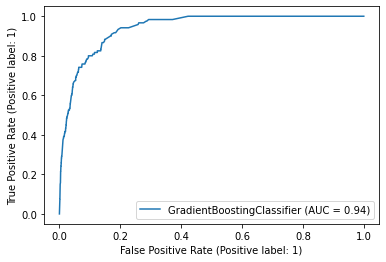

accuracy cosmic = 0.9519572953736655
auc cosmic = 0.8180253813148005


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


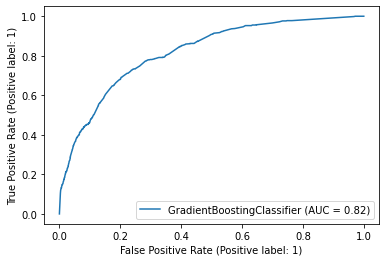

accuracy cosmic = 0.9520996441281139
auc cosmic = 0.7982863066463854


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


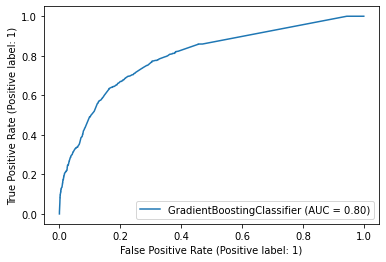

accuracy cosmic = 0.9525978647686832
auc cosmic = 0.781203295186368


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


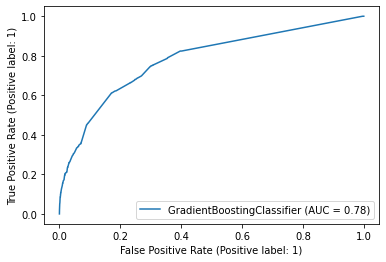

accuracy cosmic = 0.9525978647686832
auc cosmic = 0.7662866791788004


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


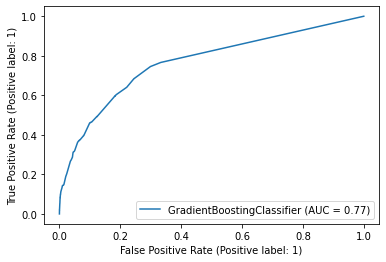

accuracy cosmic = 0.9500355871886121
auc cosmic = 0.544674799553669


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


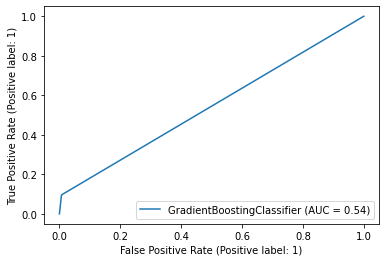

In [48]:
get_prediction_auc(model, X_test, [str(x) for x in data_valid[0:,-8]], "cosmic")
get_prediction_auc(model_2, X_test, dataframe_valid.iloc[:,12], "cosmic")
get_prediction_auc(model_3, X_test, dataframe_valid.iloc[:,12], "cosmic")
get_prediction_auc(model_4, X_test, dataframe_valid.iloc[:,12], "cosmic")
get_prediction_auc(model_5, X_test, dataframe_valid.iloc[:,12], "cosmic")
get_prediction_auc(model_6, X_test, dataframe_valid.iloc[:,12], "cosmic")

accuracy 2020Rule = 0.9906761565836298
auc 2020Rule = 0.9412766212012442


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


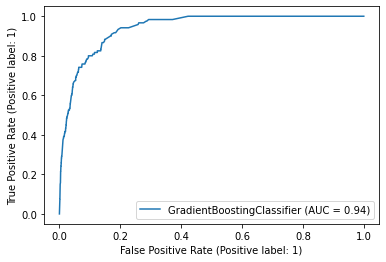

accuracy 2020Rule = 0.9913879003558719
auc 2020Rule = 0.9454737975592248


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


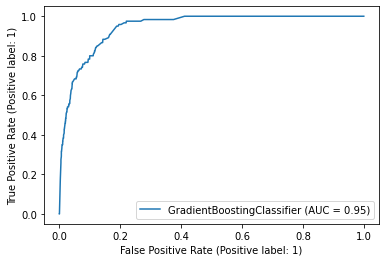

accuracy 2020Rule = 0.9915302491103203
auc 2020Rule = 0.9420315865039484


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


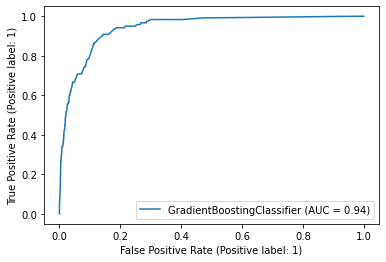

accuracy 2020Rule = 0.9916014234875444
auc 2020Rule = 0.9339845058626466


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


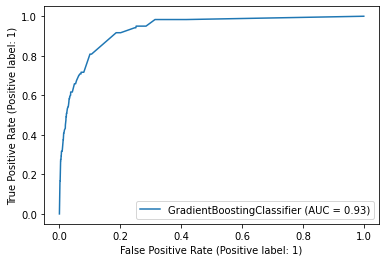

accuracy 2020Rule = 0.9916014234875444
auc 2020Rule = 0.9283485881789901


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


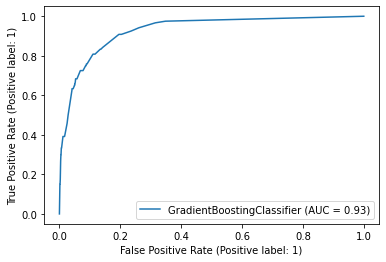

accuracy 2020Rule = 0.9847686832740213
auc 2020Rule = 0.6246799473558267


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


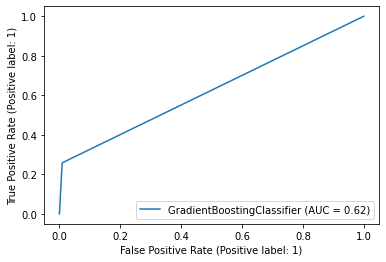

In [49]:
#  2020Rule
get_prediction_auc(model, X_test, [str(x) for x in data_valid[0:,-8]], "2020Rule")
get_prediction_auc(model_2, X_test, dataframe_valid.iloc[:,13], "2020Rule")
get_prediction_auc(model_3, X_test, dataframe_valid.iloc[:,13], "2020Rule")
get_prediction_auc(model_4, X_test, dataframe_valid.iloc[:,13], "2020Rule")
get_prediction_auc(model_5, X_test, dataframe_valid.iloc[:,13], "2020Rule")
get_prediction_auc(model_6, X_test, dataframe_valid.iloc[:,13], "2020Rule")

accuracy benchmark = 0.9838434163701067
auc benchmark = 0.9151768601796779


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


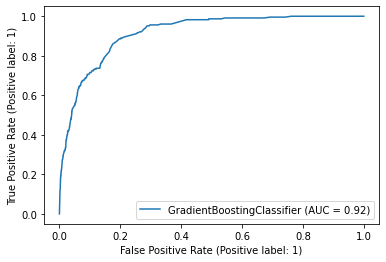

accuracy benchmark = 0.9837010676156583
auc benchmark = 0.9217080512379199


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


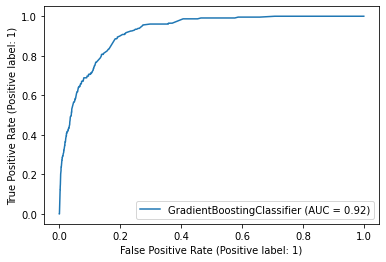

accuracy benchmark = 0.9839857651245552
auc benchmark = 0.9181440977643066


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


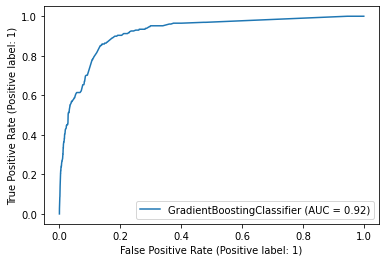

accuracy benchmark = 0.9844839857651245
auc benchmark = 0.9131888649419816


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


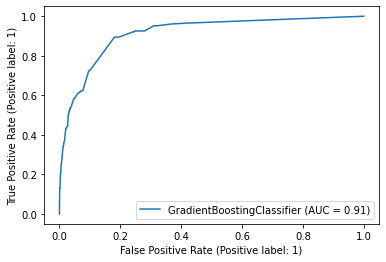

accuracy benchmark = 0.9844839857651245
auc benchmark = 0.8984288332609851


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


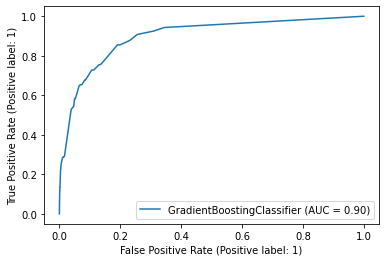

accuracy benchmark = 0.9792170818505338
auc benchmark = 0.5968980293303073


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


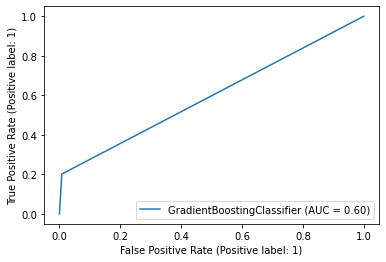

In [50]:
# benchmark
get_prediction_auc(model, X_test, [str(x) for x in data_valid[0:,-7]], "benchmark")
get_prediction_auc(model_2, X_test, dataframe_valid.iloc[:,14], "benchmark")
get_prediction_auc(model_3, X_test, dataframe_valid.iloc[:,14], "benchmark")
get_prediction_auc(model_4, X_test, dataframe_valid.iloc[:,14], "benchmark")
get_prediction_auc(model_5, X_test, dataframe_valid.iloc[:,14], "benchmark")
get_prediction_auc(model_6, X_test, dataframe_valid.iloc[:,14], "benchmark")

accuracy CGCpointMut = 0.9912455516014235
auc CGCpointMut = 0.9265321039091488


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


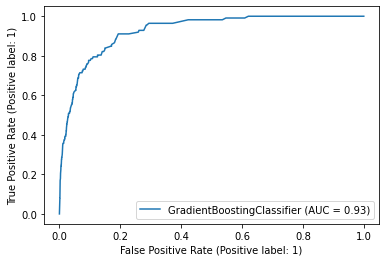

accuracy CGCpointMut = 0.9919572953736655
auc CGCpointMut = 0.9334123823873071


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


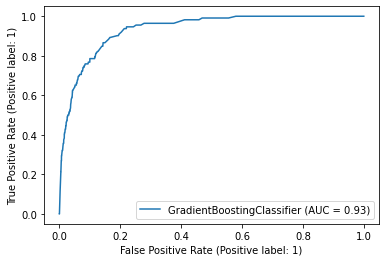

accuracy CGCpointMut = 0.9920996441281139
auc CGCpointMut = 0.9262201356005165


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


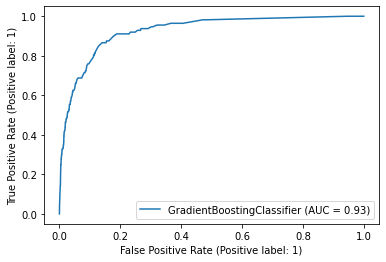

accuracy CGCpointMut = 0.9921708185053381
auc CGCpointMut = 0.9156346729393436


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


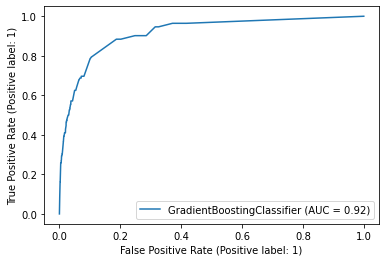

accuracy CGCpointMut = 0.9921708185053381
auc CGCpointMut = 0.9007098400057398


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


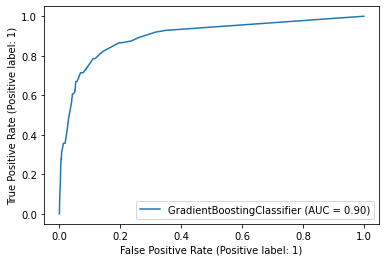

accuracy CGCpointMut = 0.9850533807829182
auc CGCpointMut = 0.6249083953426399


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


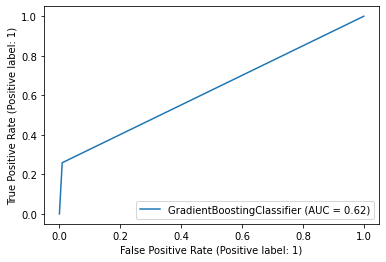

In [51]:
# CGCpointMut
get_prediction_auc(model, X_test, [str(x) for x in data_valid[0:,-6]], "CGCpointMut")
get_prediction_auc(model_2, X_test, dataframe_valid.iloc[:,15], "CGCpointMut")
get_prediction_auc(model_3, X_test, dataframe_valid.iloc[:,15], "CGCpointMut")
get_prediction_auc(model_4, X_test, dataframe_valid.iloc[:,15], "CGCpointMut")
get_prediction_auc(model_5, X_test, dataframe_valid.iloc[:,15], "CGCpointMut")
get_prediction_auc(model_6, X_test, dataframe_valid.iloc[:,15], "CGCpointMut")

accuracy CGC = 0.9612099644128114
auc CGC = 0.8426479177806266


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


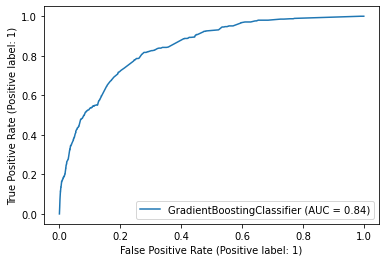

accuracy CGC = 0.9607829181494661
auc CGC = 0.8426846247753291


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


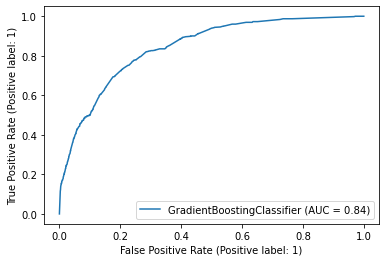

accuracy CGC = 0.9609252669039146
auc CGC = 0.8216050123367713


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


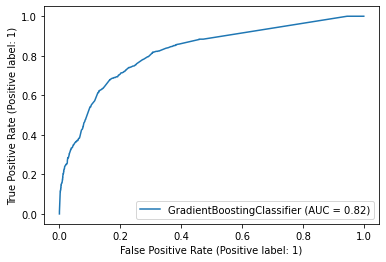

accuracy CGC = 0.961423487544484
auc CGC = 0.8072808961499395


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


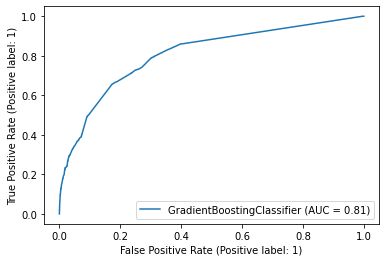

accuracy CGC = 0.961423487544484
auc CGC = 0.7907255046909795


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


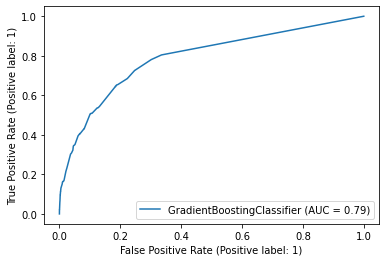

accuracy CGC = 0.9584341637010676
auc CGC = 0.5526774229569169


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


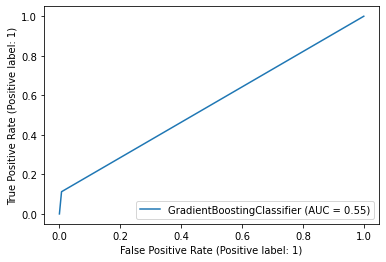

In [52]:
# CGC
get_prediction_auc(model, X_test, [str(x) for x in data_valid[0:,-5]], 'CGC')
get_prediction_auc(model_2, X_test, dataframe_valid.iloc[:,16], 'CGC')
get_prediction_auc(model_3, X_test, dataframe_valid.iloc[:,16], 'CGC')
get_prediction_auc(model_4, X_test, dataframe_valid.iloc[:,16], 'CGC')
get_prediction_auc(model_5, X_test, dataframe_valid.iloc[:,16], 'CGC')
get_prediction_auc(model_6, X_test, dataframe_valid.iloc[:,16], 'CGC')

accuracy CTAT = 0.9797864768683274
auc CTAT = 0.8642578112553451


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


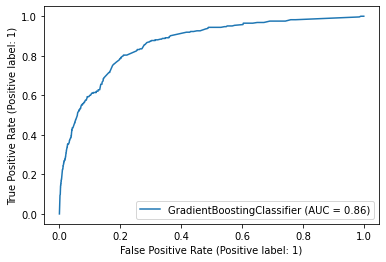

accuracy CTAT = 0.979644128113879
auc CTAT = 0.874954021450284


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


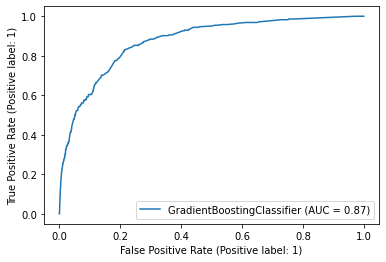

accuracy CTAT = 0.9799288256227758
auc CTAT = 0.8684395332683326


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


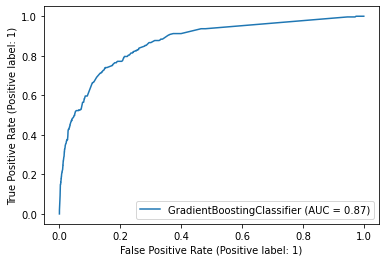

accuracy CTAT = 0.9802846975088968
auc CTAT = 0.8572007570688435


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


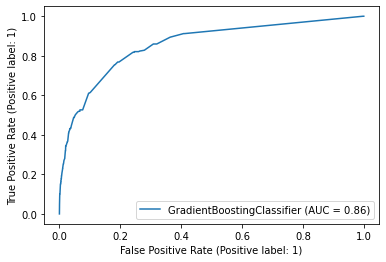

accuracy CTAT = 0.9802846975088968
auc CTAT = 0.8375046042276049


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


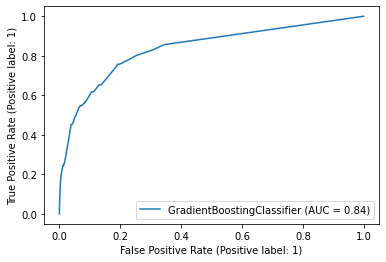

accuracy CTAT = 0.9750177935943061
auc CTAT = 0.5749154032921026


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


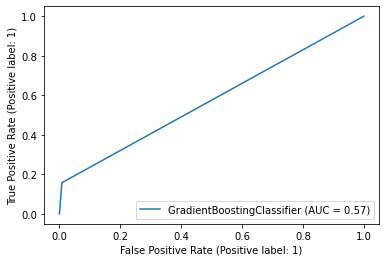

In [53]:
# CTAT
get_prediction_auc(model, X_test, [str(x) for x in data_valid[0:,-4]], 'CTAT')
get_prediction_auc(model_2, X_test, dataframe_valid.iloc[:,17], 'CTAT')
get_prediction_auc(model_3, X_test, dataframe_valid.iloc[:,17], 'CTAT')
get_prediction_auc(model_4, X_test, dataframe_valid.iloc[:,17], 'CTAT')
get_prediction_auc(model_5, X_test, dataframe_valid.iloc[:,17], 'CTAT')
get_prediction_auc(model_6, X_test, dataframe_valid.iloc[:,17], 'CTAT')

accuracy HCD = 0.9804982206405694
auc HCD = 0.8472121742427324


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


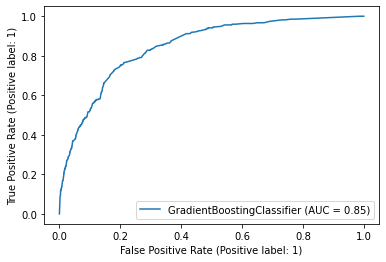

accuracy HCD = 0.9804982206405694
auc HCD = 0.8582754981825897


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


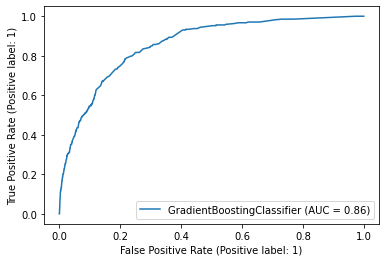

accuracy HCD = 0.9806405693950178
auc HCD = 0.8472843601681519


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


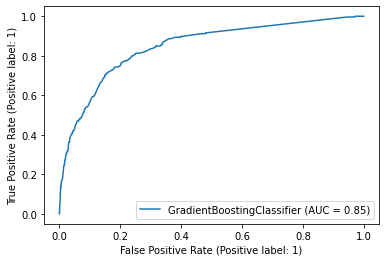

accuracy HCD = 0.9811387900355872
auc HCD = 0.8434586390600035


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


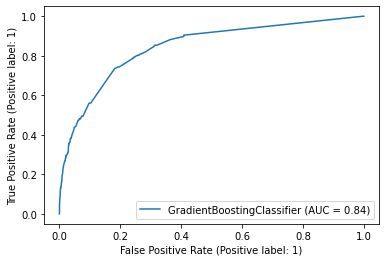

accuracy HCD = 0.9811387900355872
auc HCD = 0.829344628901862


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


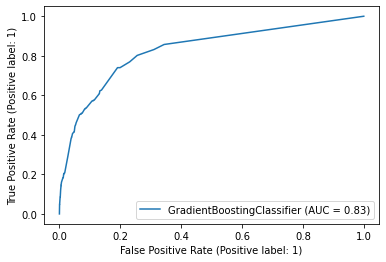

accuracy HCD = 0.9754448398576513
auc HCD = 0.5727857465899129


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


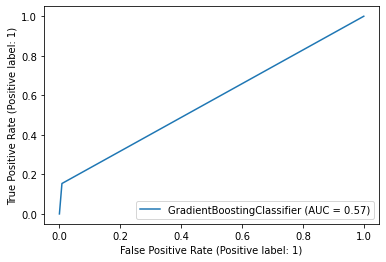

In [54]:
# HCD
get_prediction_auc(model, X_test, [str(x) for x in data_valid[0:,-3]], 'HCD')
get_prediction_auc(model_2, X_test, dataframe_valid.iloc[:,18], 'HCD')
get_prediction_auc(model_3, X_test, dataframe_valid.iloc[:,18], 'HCD')
get_prediction_auc(model_4, X_test, dataframe_valid.iloc[:,18], 'HCD')
get_prediction_auc(model_5, X_test, dataframe_valid.iloc[:,18], 'HCD')
get_prediction_auc(model_6, X_test, dataframe_valid.iloc[:,18], 'HCD')

accuracy MouseMut = 0.9464056939501779
auc MouseMut = 0.6520851553542579


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


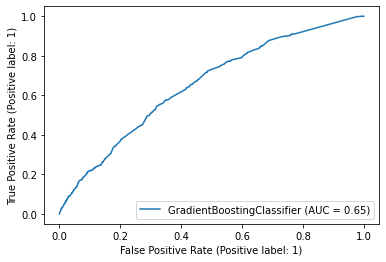

accuracy MouseMut = 0.9474021352313168
auc MouseMut = 0.6723482673904262


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


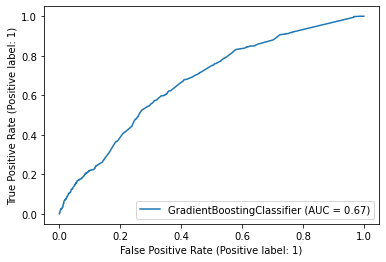

accuracy MouseMut = 0.9474021352313168
auc MouseMut = 0.6464620323411768


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


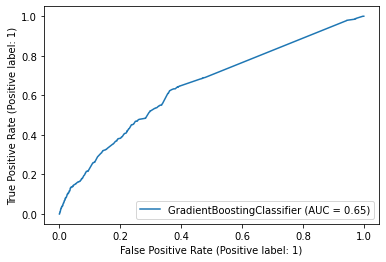

accuracy MouseMut = 0.9471886120996441
auc MouseMut = 0.6467402722404628


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


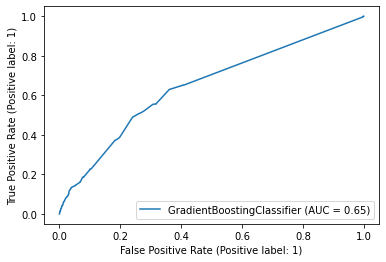

accuracy MouseMut = 0.9471886120996441
auc MouseMut = 0.6240986594811861


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


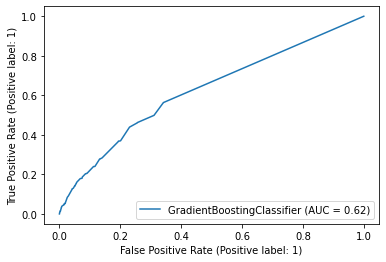

accuracy MouseMut = 0.9400711743772242
auc MouseMut = 0.5127323636517616


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


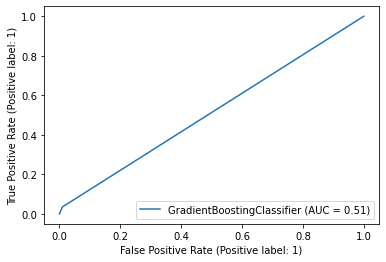

In [55]:
# MouseMut
get_prediction_auc(model, X_test, [str(x) for x in data_valid[0:,-2]], 'MouseMut')
get_prediction_auc(model_2, X_test, dataframe_valid.iloc[:,19], 'MouseMut')
get_prediction_auc(model_3, X_test, dataframe_valid.iloc[:,19], 'MouseMut')
get_prediction_auc(model_4, X_test, dataframe_valid.iloc[:,19], 'MouseMut')
get_prediction_auc(model_5, X_test, dataframe_valid.iloc[:,19], 'MouseMut')
get_prediction_auc(model_6, X_test, dataframe_valid.iloc[:,19], 'MouseMut')

accuracy OncoGene = 0.953238434163701
auc OncoGene = 0.7882681328946611


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


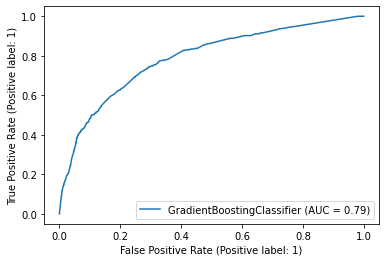

accuracy OncoGene = 0.9535231316725978
auc OncoGene = 0.7888842737299828


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


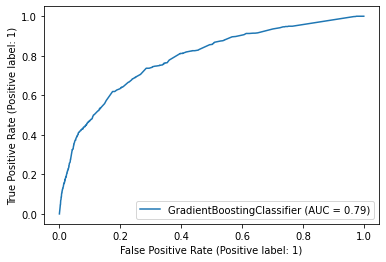

accuracy OncoGene = 0.9535231316725978
auc OncoGene = 0.7715051186031158


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


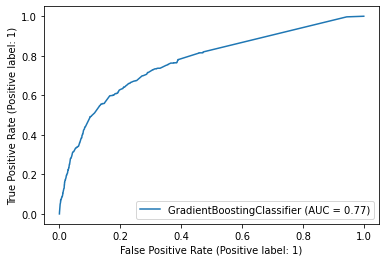

accuracy OncoGene = 0.9538790035587189
auc OncoGene = 0.7559341507757577


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


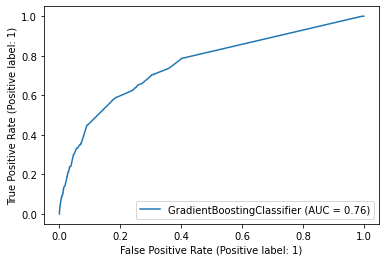

accuracy OncoGene = 0.9538790035587189
auc OncoGene = 0.7494631310820794


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


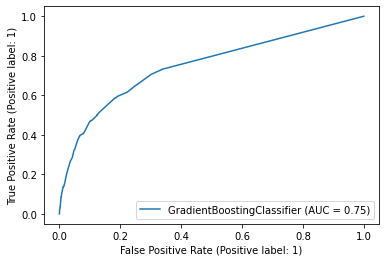

accuracy OncoGene = 0.9496085409252669
auc OncoGene = 0.5350717453655891


/usr/local/Anaconda/envs/py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


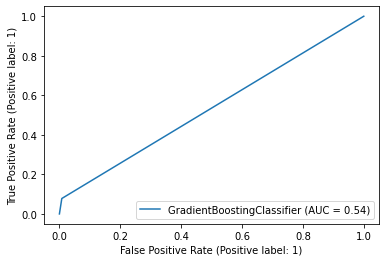

In [56]:
# OncoGene
get_prediction_auc(model, X_test, [str(x) for x in data_valid[0:,-1]], 'OncoGene')
get_prediction_auc(model_2, X_test, dataframe_valid.iloc[:,20], 'OncoGene')
get_prediction_auc(model_3, X_test, dataframe_valid.iloc[:,20], 'OncoGene')
get_prediction_auc(model_4, X_test, dataframe_valid.iloc[:,20], 'OncoGene')
get_prediction_auc(model_5, X_test, dataframe_valid.iloc[:,20], 'OncoGene')
get_prediction_auc(model_6, X_test, dataframe_valid.iloc[:,20], 'OncoGene')

In [57]:
2020Rule    124    -none- character
benchmark   233    -none- character
CGCpointMut 118    -none- character
CGC         567    -none- character
CTAT        297    -none- character
HCD         288    -none- character
MouseMut    797    -none- character
oncoGene    688    -none- character

SyntaxError: invalid syntax (3092549723.py, line 1)

In [58]:
print(dataframe_train.shape)
valid_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_validation.csv"
dataframe_valid = read_csv(valid_url, header=None)
print(dataframe_valid.shape)

(14051, 12)
(14050, 21)


In [59]:
dataframe_valid.head

<bound method NDFrame.head of         0         1         2         3         4         5         6   \
0        7  0.005118  0.003412  0.005945  0.001137  0.011838  0.005221   
1      102  0.007031  0.006772  0.008375  0.001654  0.015199  0.005635   
2      286  0.002068  0.001706  0.002016  0.000310  0.004704  0.001654   
3        1  0.005635  0.005945  0.007754  0.002430  0.019903  0.004756   
4      202  0.018197  0.010908  0.021454  0.005376  0.041150  0.014682   
...    ...       ...       ...       ...       ...       ...       ...   
14045    1  0.000310  0.000000  0.000155  0.000000  0.000103  0.000103   
14046    1  0.000000  0.000000  0.000000  0.000000  0.000103  0.000000   
14047    1  0.000000  0.000052  0.000000  0.000000  0.000052  0.000000   
14048    1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14049    1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             7         8         9   ...        11 12  13  14  15  16  17  18  \


In [72]:
# Load train dataset
valid_url =  "/data/timonaj/cancer_as_wound/ppi_analysis/machine_learning/STRING_S_EXP_total_fraction_validation.csv"
dataframe_valid = read_csv(valid_url, header=None)
# print(dataframe_valid)
data_valid = dataframe_valid.values
X_test = (data_valid[:, 1:-11])
Y_test = [str(x) for x in data_valid[0:,-11]]
model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=1, random_state=0)
model.fit(X_test,Y_test)

#model.score(X_test,Y_test)

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=50,
                           random_state=0)

In [50]:
current_test = [str(x) for x in data_valid[0:,11]]
model.score(X_test,current_test)

0.0

In [3]:
command = "printf \"#!/bin/bash\nmodule load python\npython /data/timonaj/cancer_as_wound/ppi_analysis/get_gradient_boost_model.py "
 + "\" > " +  "gradient_boost_model.job \nsbatch --mem=50g --cpus-per-task=4 --gres=lscratch:2 --time 8:00:00 gradient_boost_model.job \n"
print(command)
#os.system(command)

IndentationError: unexpected indent (<ipython-input-3-6345bfe8cd95>, line 2)

In [ ]:
model.score(X_test, Y_test)

print(result)

Average precision score: 0.33
Average recall score: 0.02
f1 on test data : 0.040000
Accuray on test data : 0.962781
roc_auc on test data : 0.509834


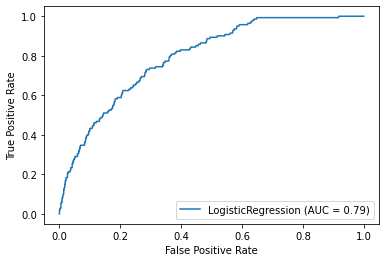

In [17]:
####### Logistic Regression Classifier ####
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

clf = LogisticRegression(penalty='l1', C=1.0, class_weight=None, solver='liblinear')
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred)
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

In [25]:
####### ExtraTree Classifier ####
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=2)
clf.fit(X_train, y_train)

# make a prediction
y_pred = clf.predict(X_test)

# summarize prediction

average_precision = precision_score(y_test, y_pred)
print('Average precision score: {0:0.2f}'.format(average_precision))

average_recall = recall_score(y_test, y_pred)
print('Average recall score: {0:0.2f}'.format(average_recall))

score_res = f1_score(y_test,y_pred)
print("f1 on test data : %f" % score_res)

score_res = accuracy_score(y_test,y_pred)
print("Accuray on test data : %f" % score_res)

score_res = roc_auc_score(y_test,y_pred)
print("roc_auc on test data : %f" % score_res)

plot_roc_curve(clf, X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [14050, 11240]